# Election Results:

#### We're part of an impartial research group that conducts phone surveys prior to local elections. During this election season, the group conducted a survey to determine how many people would vote for Cynthia Ceballos vs. Justin Kerrigan in the mayoral election.

#### Now that the election has occurred, our group wants to compare the survey responses to the actual results. Was our survey a good indicator? Let's find out!

First, we import `numpy` and `matplotlib`:

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
survey_responses = ['Ceballos', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos',
                    'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos', 
                    'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 
                    'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 
                    'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Ceballos', 
                    'Ceballos', 'Ceballos', 'Ceballos', 'Ceballos', 'Ceballos',
                    'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos', 
                    'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 
                    'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 
                    'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Ceballos',
                    'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos', 
                    'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 
                    'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 
                    'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Ceballos']

Above is a list of different survey responses. We will calculate the number of people who answered 'Ceballos' and save the answer to the variable `total_ceballos`. Then we'll print the variable to the terminal to see its value.

We must first convert our list of survey responses to an array using `numpy`.

In [24]:
survey_responses_array = np.array(survey_responses)

Then we select the indices with only Ceballos' name, use the len function to get the count of Ceballos' responses, and assign it to the variable `total_ceballos`.

In [25]:
total_ceballos = len(survey_responses_array
                    [survey_responses_array == 'Ceballos'])
print(total_ceballos)

33


Now we'll calculate the percentage of people in the survey who voted for Ceballos and save it to the variable `percentage_ceballos`. We'll print the variable to the terminal to see its value.

In [26]:
percentage_ceballos = np.mean(
                             survey_responses_array
                             == 'Ceballos')
print('{}%'.format(
                  percentage_ceballos * 100))

47.1428571429%


In the real election, 54% of the 10,000 town population voted for Cynthia Ceballos. Our supervisors are concerned because this is a very different outcome than what the poll predicted. They want us to determine if there is something wrong with the poll or if given the sample size, it was an entirely reasonable result. We'll now generate a binomial distribution that takes the number of total survey responses, the actual success rate, and the size of the town's population as its parameters. Then we'll divide the distribution by the number of survey responses. We'll save our calculation to the variable `possible_surveys`.

In [27]:
total_survey_responses = len(survey_responses_array)
possible_surveys = np.random.binomial(
    total_survey_responses,
    0.54,
    size=10000) / float(
    total_survey_responses)
print(possible_surveys)

[0.4        0.51428571 0.58571429 ... 0.5        0.44285714 0.48571429]


Now we plot a histogram of `possible_surveys` with a range of 0-1 and 20 bins.

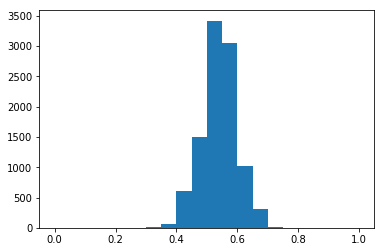

In [28]:
plt.hist(possible_surveys,
        range=(0, 1),
        bins=20)
plt.show()

As we saw, 47% of people we surveyed said they would vote for Ceballos, but 54% of people voted for Ceballos in the actual election. Let's calculate the percentage of surveys that could have an outcome of Ceballos receiving less than 50% of the vote and save it to the variable `ceballos_loss_surveys`.

In [29]:
ceballos_loss_surveys = np.mean(
    possible_surveys < 0.5)
print(ceballos_loss_surveys)

0.2167


Let's generate another binomial distribution, but this time, see what would happen if we had instead surveyed 7,000 people. We will divide the distribution by the size of the survey and save our findings to `large_survey`.

In [30]:
large_survey = np.random.binomial(
    7000,
    0.54,
    size=10000) / 7000.
print(large_survey)

[0.53314286 0.53685714 0.53814286 ... 0.53257143 0.538      0.54085714]


Now, we recalculate the percentage of surveys that would have an outcome of Ceballos losing and save it to the variable `ceballos_loss_new`. We print the value to the terminal.

In [31]:
ceballos_loss_new = np.mean(
    large_survey < 0.50)
print(ceballos_loss_new)

0.0


- ##### What do we notice about this new value? 
- ##### What advice would we give to our supervisors about predicting results from surveys?

This new value (0) means that if we surveyed 7,000 people, Ceballos would never be predicted to lose, accurately reflecting the actual election results. This means that if we generate a survey with a large enough sample of responders, we will be able to completely accurately predict the election results. So, we would advise our supervisors that we can only accurately predict results based on surveys if our number of responders is large enough.